# TIAS Assignment Exploratory Data Analysis 

In this assingment we will look at probably the most important aspect of Data Science, Exploratory Data Analysis.
The dataset we are going the use is the wine data set of SKlearn. This is a very well know data set for machine learning students. In this workbook you will learn how to start with EDA and how to extract the most important features in the data. 
The following topics will be adressed:

-Summary Statistics,

-Graphs in matplotlib and seaborn,

-Correlation plots,

-Random Forrest for feature importances.






# Assignment

After the explanation of the various techniques I want to ask you to do the following assignment:

Play with the four techniques that are mentioned above and try to understand the data.
When you become familiar with the data please use the techniques to find the most importance features.
Describe your findings in a short story or slide. You will get 30 minutes to finalize this assignment.
Under each technique you will find a sub assingment that combined will result in the final assignment.

-------------------------------------------------------------------------------------------------------------------------------

# Data preperation & Techniques

The first step in a Data Science coding project is of course importing all libraries.
Just import the ones below, these are the one you need

In [1]:
#import the right libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import sklearn as sk
import numpy as np
from sklearn.datasets import load_wine

The next step is importing the data. Because we will use the wine dataset of SKlearn we can directly imported.
Normally this goes a little bit different, but this is out of the scope for now.

In [2]:
#Load data from example datasets SK learn
loaddata = load_wine()

After loading the dataset we can look at the summary. Read the data carefully!

In [3]:
#how does the data look like
print(loaddata['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

-------------------------------------------------------------------------------------------------------------------------------

Now that we know what the dataset is about we can move the data to a dataframe for analysis.
A dataframe is essentially your excel sheet where you are going to work in. 
Before we can do anything, we need to load the data to the dataframe.
Don't get impressed by the code, it just loads the data into a dataframe

In [16]:
#Dataframes are great for organizing your data.
#load all data into a dataframe
dfdata = pd.DataFrame(data=loaddata['data'],columns=loaddata['feature_names'])
dfdata['target']=loaddata['target']
dfdata['class']=dfdata['target'].map(lambda ind: loaddata['target_names'][ind])


-------------------------------------------------------------------------------------------------------------------------------

Pandas is the libriary that makes making dataframes easy. It also has a lot of other really handy features.
One of them is the function .head. This show you the first N rows of your dataset.
Lets do it.

In [17]:
dfdata.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,class_0


-------------------------------------------------------------------------------------------------------------------------------

We now see rows and columns of data and its hard to say anything about the data.
Pandas has very neat function called describe; this shows the most important descriptive statistics.

In [5]:
#Pandas has a really great function called describe.
dfdata.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


-------------------------------------------------------------------------------------------------------------------------------

Assignment: Please write down you findings of the summary statistics.

-------------------------------------------------------------------------------------------------------------------------------

Altough the descriptive statistics summary gives you some great information, it would be much clearer if this can be made visual. In this case we will use my favorite plots called pairplots, these will give a graph per variable combination.
It is a great way to see if there are correlations or clusters in your data.

In the color red you see the variables that are in our dataframe. Below the variables you see Yg and Xg. These are your variables in the pairplot. If you remove 'alcohol' for example and replace it with 'ash', you will get a plot containing 'ash' and 'proline'. Try it for yourself.

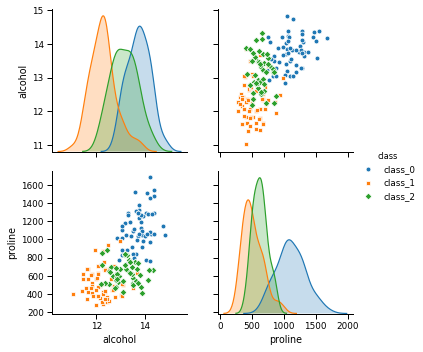

In [8]:
#Now we make some plots with specific variables

'''
alcohol
malic_acid
ash
alcalinity_of_ash
magnesium
total_phenols
flavanoids
nonflavanoid_phenols
proanthocyanins
color_intensity
hue
od280/od315_of_diluted_wines
proline
'''

Yg="alcohol"
Xg="proline"

sn.pairplot(dfdata, vars=[Yg,Xg], hue = 'class', markers=["o", "s", "D"])

-------------------------------------------------------------------------------------------------------------------------------

Assigment: Go through the different combinations of variables, visualize them. Then try to draw some preliminary conclusions/ findings. Please write them down for later use.

-------------------------------------------------------------------------------------------------------------------------------

I hope that you found some interesting facts/findings. The visualization step already made much clear. The next logical next step is of course determining which variables are the most important ones. You want to have enough variables to would solve the problem but not more, otherwise you run into trouble. Remember the curse of dimensionality!

Most of you will be familiar with the concept of correlation. A very easy way the see which variables are important in your data is by doing a simple correlation plot. In the cells of the plot you see the correlation strenght. On top of that, the darker the cell, the higher correlation.

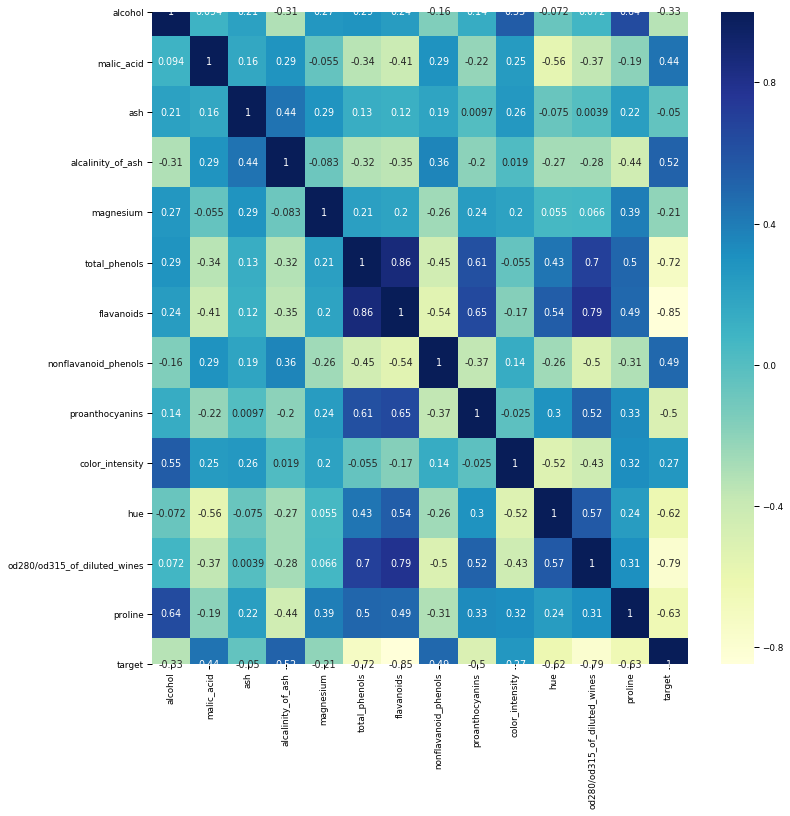

In [68]:
#lets investigate if there are meaningfull correlations
plt.figure(figsize=(12, 12))
corr = dfdata[dfdata.columns].corr()
sn.heatmap(corr, cmap="YlGnBu", annot = True)

-------------------------------------------------------------------------------------------------------------------------------

Assigment: look at the correlation plot and determine the relationships between the 'Target' and the other variables. Please write it down in one or two sentences.

-------------------------------------------------------------------------------------------------------------------------------

There are other ways to determine which variables explain the most variance. One of them is to use a Random Forrest.
A Random Forrest is a Machine learning technique that can be used for classifcation and regression purposes.
They can also be used to determining variable/feature importances. Later we will talk about Random Forrests again, but for now we will only use it as a feature importance indicator. 

In [58]:
dfdata_2 = dfdata.drop(columns=['target', 'class'])

# Load data
X = dfdata_2
y = dfdata.target

C:\Users\Carlo.van.den.Boom\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


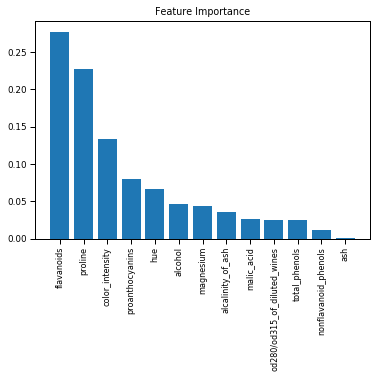

In [63]:
# Create decision tree classifer object
clf = RandomForestClassifier(random_state=0, n_jobs=-1)
# Train model
model = clf.fit(X, y)

# Calculate feature importances
importances = model.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
feature_names = list(X.columns)
names = [feature_names[i] for i in indices]

# Barplot: Add bars
plt.bar(range(X.shape[1]), importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90, fontsize = 8)
# Create plot title
plt.title("Feature Importance")
# Show plot
plt.show()


-------------------------------------------------------------------------------------------------------------------------------

Assignment: Look at the Feature Importance graph, what do you see? Does it line with your findings earlier?

-------------------------------------------------------------------------------------------------------------------------------

Final Assignment: summarize all your findings in one short summary